# Assignment15_Random forest(fraud_check)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 1 - Business Problem

Use Random Forest to prepare a model on fraud data

# 2 - Data collection and description

In [5]:
df = pd.read_csv("Fraud_check.csv")
df1 = df.copy()
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
colnames = list(df.columns)

In [8]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [9]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [10]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

Outlier Check

C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


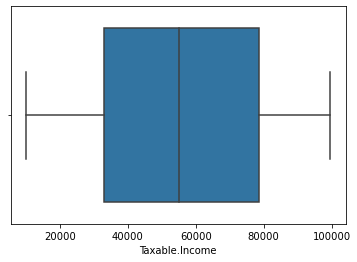

In [11]:
ax = sns.boxplot(df1['Taxable.Income'])

There are no outliers in the data

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


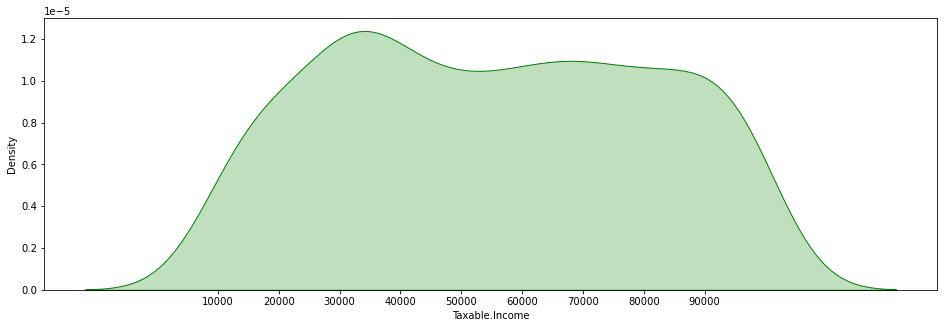

In [12]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

The data is Skwed on the right
The data has negative Kurtosis

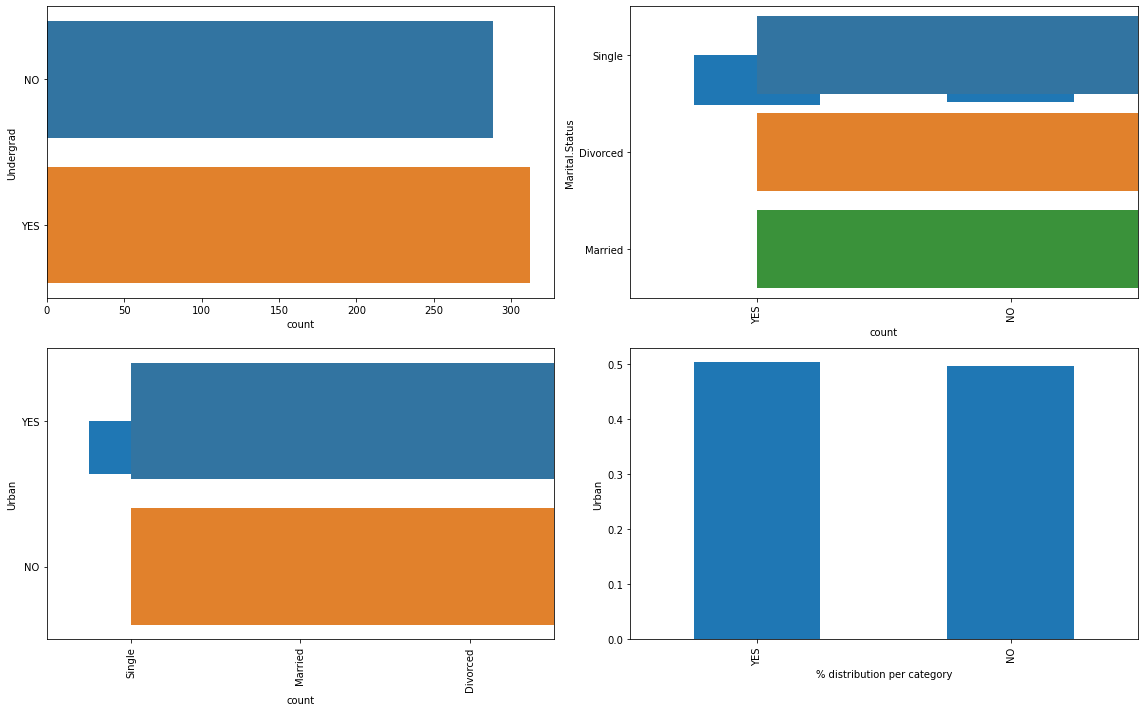

In [13]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

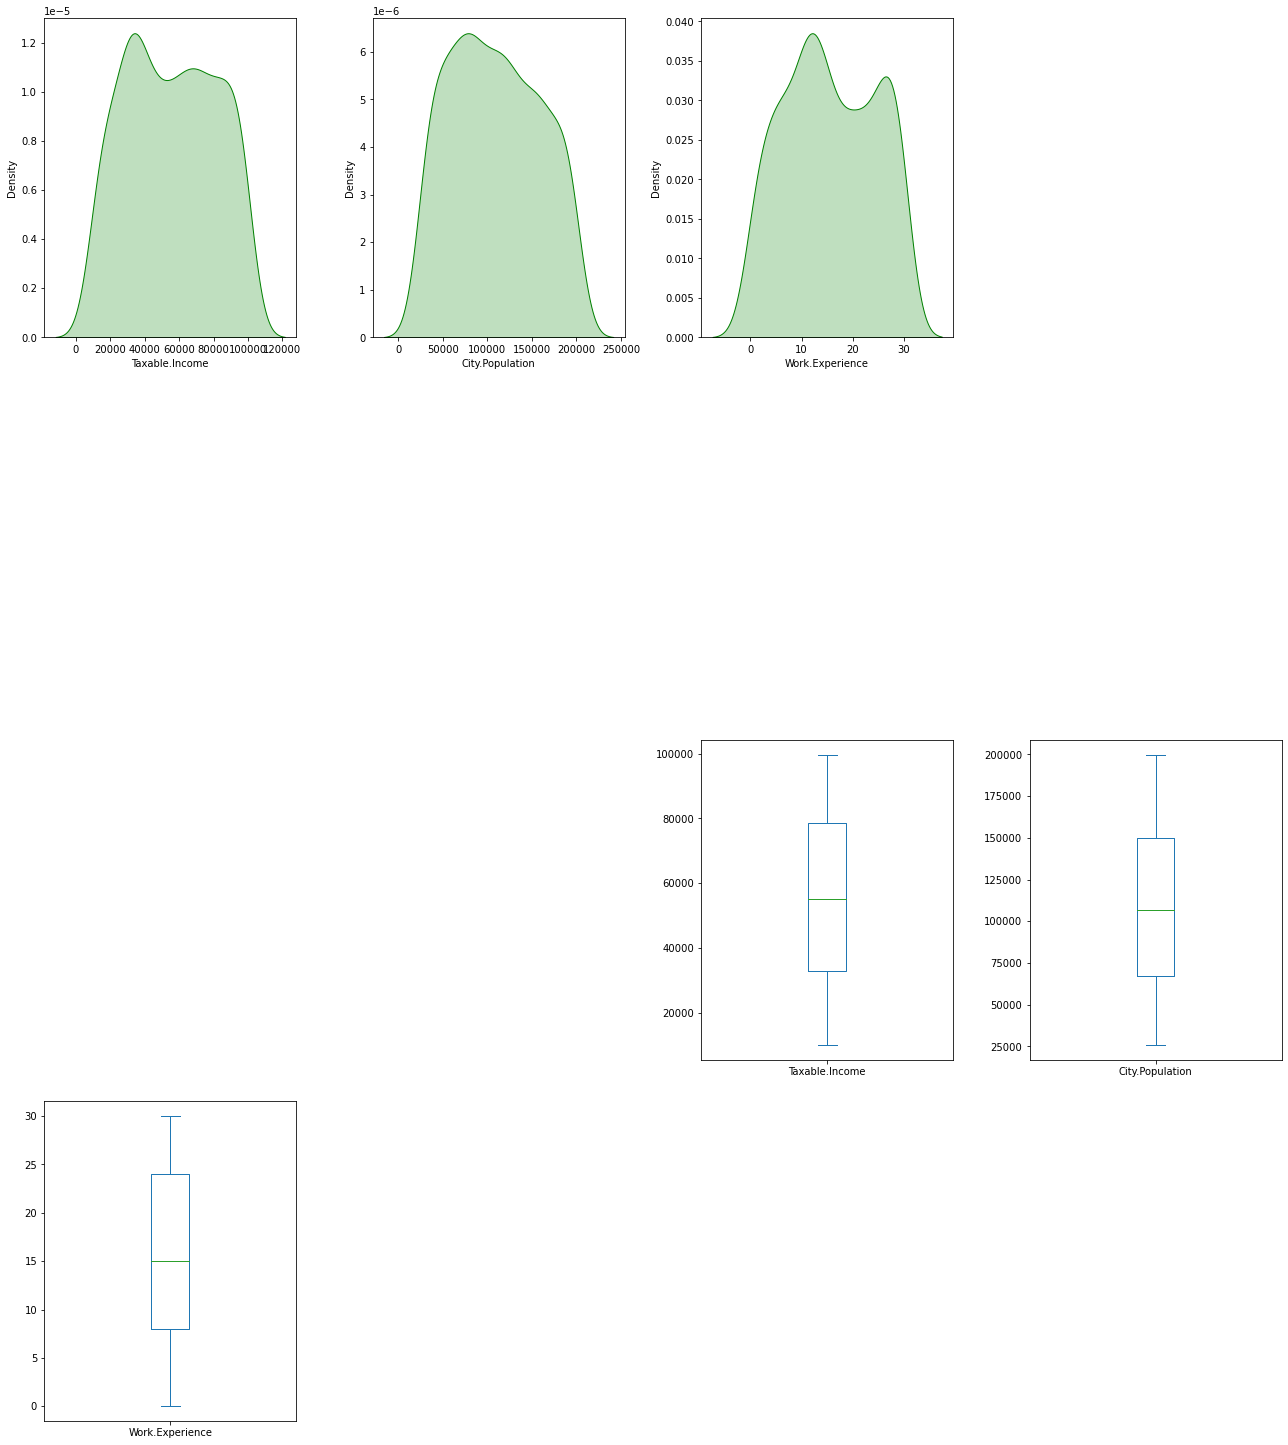

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [14]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

<AxesSubplot:>

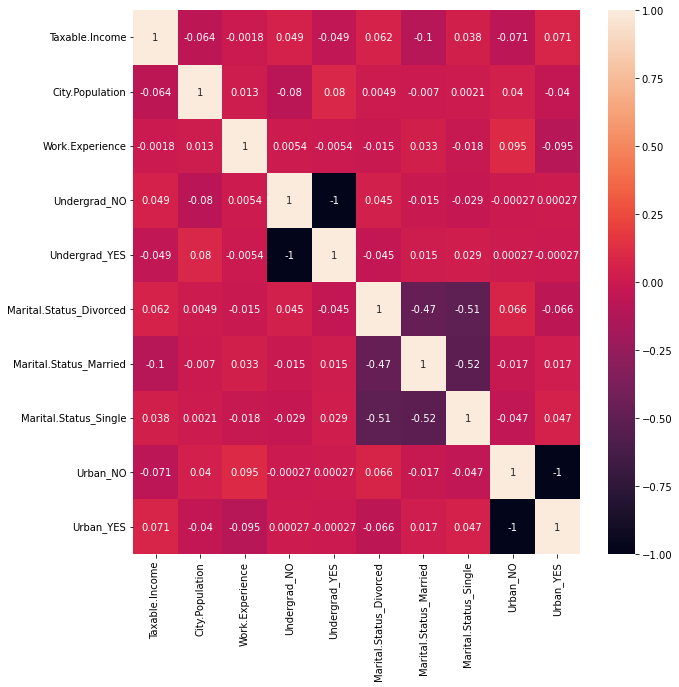

In [15]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])
corr = df1.corr()
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# 3 - Random Forest  model 

Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [16]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [17]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
y_train.value_counts()

good     385
risky     95
Name: Taxable.Income, dtype: int64

In [18]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.75

In [19]:
pred_train = model.predict(x_train)

In [20]:
accuracy_score(y_train,pred_train)

1.0

In [21]:
confusion_matrix(y_train,pred_train)

array([[385,   0],
       [  0,  95]], dtype=int64)

In [22]:
pred_test = model.predict(x_test)
accuracy_score(y_test,pred_test)

0.6916666666666667

In [23]:
confusion_matrix(y_test,pred_test)

array([[82,  9],
       [28,  1]], dtype=int64)

In [24]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [25]:
df_t

,Actual,Predicted
514,good,good
296,good,good
280,risky,good
151,good,risky
259,risky,good
...,...,...
70,good,good
266,good,good
491,risky,good
207,risky,risky


In [26]:
df1.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

[Text(445.56265470297024, 524.1857142857143, 'Urban_YES <= 0.5\nentropy = 0.669\nsamples = 299\nvalue = [396, 84]\nclass = T'),
 Text(229.9678217821782, 485.3571428571429, 'City.Population <= 189530.0\nentropy = 0.634\nsamples = 146\nvalue = [205, 39]\nclass = T'),
 Text(221.68069306930693, 446.52857142857147, 'Marital.Status_Married <= 0.5\nentropy = 0.657\nsamples = 137\nvalue = [191, 39]\nclass = T'),
 Text(140.88118811881188, 407.70000000000005, 'Work.Experience <= 12.5\nentropy = 0.548\nsamples = 98\nvalue = [138, 20]\nclass = T'),
 Text(66.29702970297029, 368.8714285714286, 'Undergrad_YES <= 0.5\nentropy = 0.771\nsamples = 39\nvalue = [48, 14]\nclass = T'),
 Text(33.148514851485146, 330.0428571428572, 'City.Population <= 131670.0\nentropy = 0.764\nsamples = 18\nvalue = [21, 6]\nclass = T'),
 Text(16.574257425742573, 291.2142857142857, 'Marital.Status_Divorced <= 0.5\nentropy = 0.454\nsamples = 14\nvalue = [19, 2]\nclass = T'),
 Text(8.287128712871286, 252.3857142857143, 'entropy 

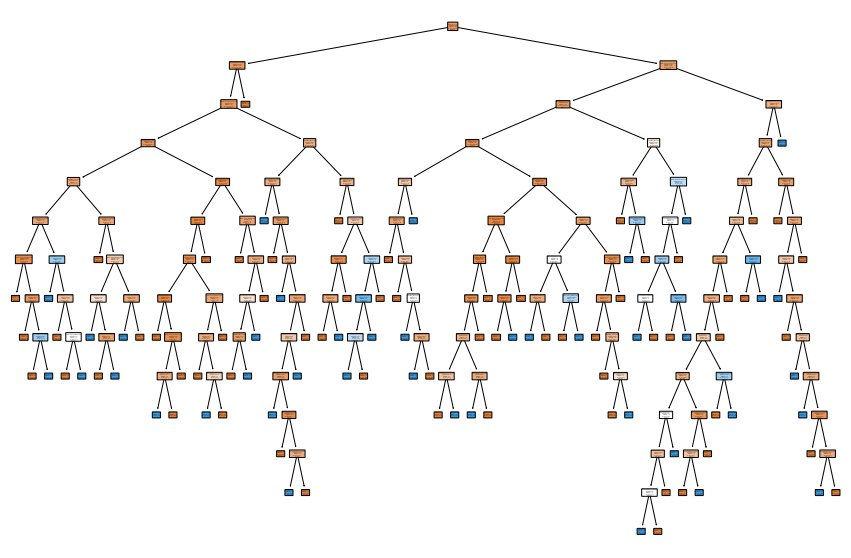

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

cols = list(df1.columns)
predictors = cols[1:10]
target = cols[0]
tree1 = model.estimators_[20]

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[20], 
          feature_names=predictors,
          class_names=target, 
          filled=True, impurity=True, 
          rounded=True)

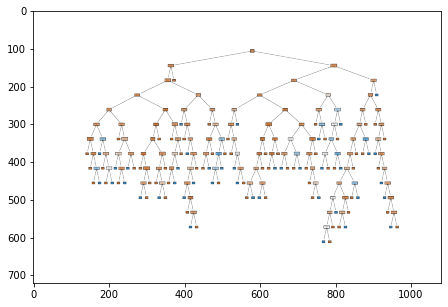

In [28]:
img=fig.savefig("fraud_full.png")
img = mpimg.imread('fraud_full.png') 
plt.imshow(img)

# 4 - Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 70%
As seen in the confusion matrix of Test data 85 instances are presdected correctly and 35 instances are not

[Text(354.11538461538464, 475.65000000000003, 'Marital.Status_Divorced <= 0.5\ngini = 0.327\nsamples = 297\nvalue = [381, 99]\nclass = T'),
 Text(128.76923076923077, 339.75, 'Work.Experience <= 1.5\ngini = 0.345\nsamples = 210\nvalue = [256, 73]\nclass = T'),
 Text(64.38461538461539, 203.85000000000002, 'gini = 0.0\nsamples = 5\nvalue = [9, 0]\nclass = T'),
 Text(193.15384615384616, 203.85000000000002, 'Urban_YES <= 0.5\ngini = 0.352\nsamples = 205\nvalue = [247, 73]\nclass = T'),
 Text(128.76923076923077, 67.94999999999999, 'gini = 0.391\nsamples = 99\nvalue = [113, 41]\nclass = T'),
 Text(257.53846153846155, 67.94999999999999, 'gini = 0.311\nsamples = 106\nvalue = [134, 32]\nclass = T'),
 Text(579.4615384615385, 339.75, 'Undergrad_YES <= 0.5\ngini = 0.285\nsamples = 87\nvalue = [125, 26]\nclass = T'),
 Text(450.69230769230774, 203.85000000000002, 'Urban_NO <= 0.5\ngini = 0.296\nsamples = 46\nvalue = [68, 15]\nclass = T'),
 Text(386.3076923076923, 67.94999999999999, 'gini = 0.346\nsam

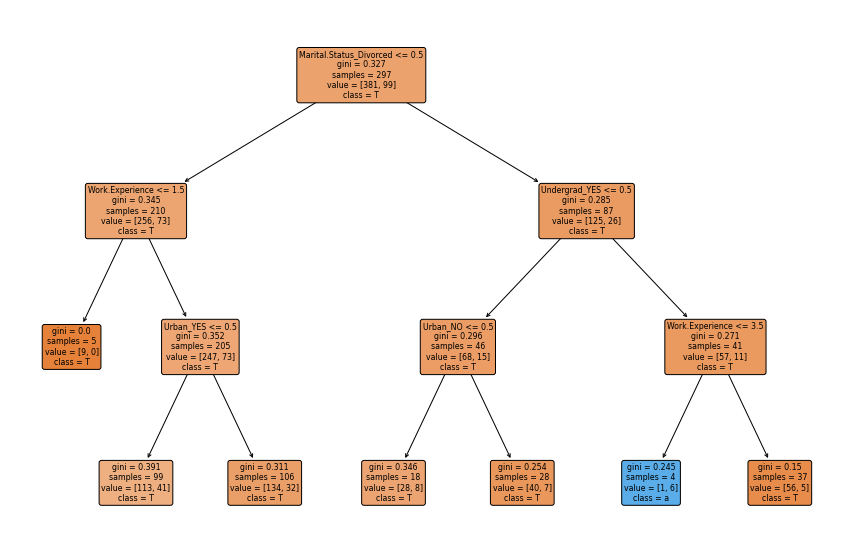

In [29]:
rf_small = RF(n_estimators=10, max_depth = 3)
rf_small.fit(x_train,y_train)
RF(max_depth=3, n_estimators=10)
tree_small = rf_small.estimators_[5]

fig = plt.figure(figsize=(15, 10))
plot_tree(tree_small, 
          feature_names=predictors,
          class_names=target, 
          filled=True, impurity=True, 
          rounded=True)

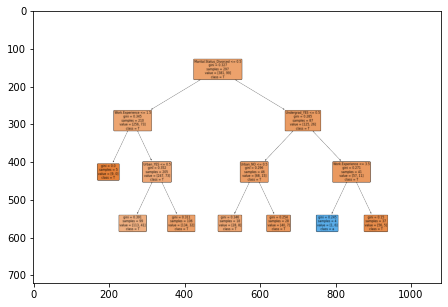

In [30]:
img=fig.savefig("fraud_small.png")
img = mpimg.imread('fraud_small.png') 
plt.imshow(img)

In [31]:
model.feature_importances_

array([0.52225635, 0.3554779 , 0.01271477, 0.01605099, 0.01799966,
       0.02247797, 0.01992672, 0.01724255, 0.01585311])

In [32]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
0,City.Population,0.522256
1,Work.Experience,0.355478
5,Marital.Status_Married,0.022478
6,Marital.Status_Single,0.019927
4,Marital.Status_Divorced,0.018000
7,Urban_NO,0.017243
3,Undergrad_YES,0.016051
8,Urban_YES,0.015853
2,Undergrad_NO,0.012715


As seen in the above table city population is most important feature